# **Staring kit for Higgs ML**

In [ ]:
import random,string,math,csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### **Reading training data**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


## Load the data

In [ ]:
# Load CSV data
data = np.loadtxt('data.csv', delimiter=',', dtype=np.float32)
print('Original data:', data.shape)

# Split data into features, labels and weights
features, labels, weights = data[:, 1:-2], data[:, -1], data[:, -2]
print('Features', features.shape)
print('Labels', labels.shape)
print('Weights', weights.shape)

# Fill missing data
for i in range(30):
    features[features[:, i] == -999, i] = 0

# Save as NPZ format
np.savez('data.npz', features=features, labels=labels, weights=weights)

Original data: (250000, 33)
Features (250000, 30)
Labels (250000,)
Weights (250000,)


## plot the data

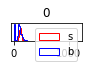

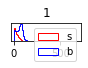

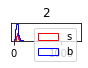

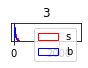

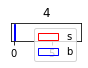

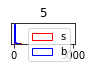

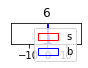

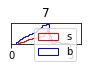

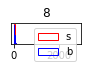

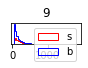

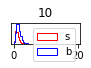

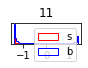

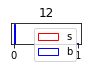

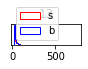

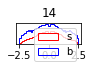

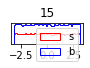

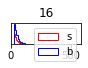

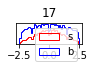

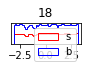

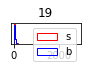

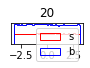

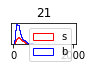

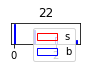

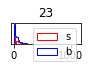

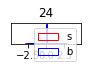

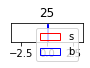

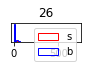

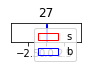

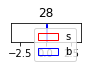

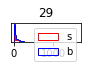

In [ ]:
# Load data
data = np.load('data.npz')
features, labels, weights = data['features'], data['labels'], data['weights']

# Split signal and background examples
signals = features[labels == 1]
backgrounds = features[labels == 0]

# Plot
for i in range(30):
    plt.subplot(6, 5, i + 1)
    plt.hist(signals[:, i], bins=50, color='r', histtype='step', label='s')
    plt.hist(backgrounds[:, i], bins=50, color='b', histtype='step', label='b')
    plt.title(str(i))
    plt.yticks([])
    plt.legend()
    plt.tight_layout()
    plt.pause(0.001)

plt.show()

## Normalize it

In [ ]:

# Load data
data = np.load('data.npz')
features, labels, weights = data['features'], data['labels'], data['weights']

# Normalize features
features[:, 0] = features[:, 0] / 300
features[:, 1] = features[:, 1] / 200
features[:, 2] = features[:, 2] / 250
features[:, 3] = features[:, 3] / 300
features[:, 4] = features[:, 4] / 8
features[:, 5] = features[:, 5] / 1000
features[:, 6] = features[:, 6] / 10
features[:, 7] = features[:, 7] / 5
features[:, 8] = features[:, 8] / 150
features[:, 9] = features[:, 9] / 500
features[:, 10] = features[:, 10] / 5
features[:, 11] = features[:, 11] / 2
features[:, 12] = features[:, 12] / 1
features[:, 13] = features[:, 13] / 100
features[:, 14] = features[:, 14] / 3
features[:, 15] = features[:, 15] / 3
features[:, 16] = features[:, 16] / 100
features[:, 17] = features[:, 17] / 3
features[:, 18] = features[:, 18] / 3
features[:, 19] = features[:, 19] / 200
features[:, 20] = features[:, 20] / 3
features[:, 21] = features[:, 21] / 500
features[:, 22] = features[:, 22] / 3
features[:, 23] = features[:, 23] / 250
features[:, 24] = features[:, 24] / 4
features[:, 25] = features[:, 25] / 3
features[:, 26] = features[:, 26] / 150
features[:, 27] = features[:, 27] / 5
features[:, 28] = features[:, 28] / 3
features[:, 29] = features[:, 29] / 300

# Save
np.savez_compressed('normalized_data.npz', features=features, labels=labels, weights=weights)


## spilit the data into traning and testing  for variation

In [ ]:
# Load data
data = np.load('data.npz')
features, labels, weights = data['features'], data['labels'], data['weights']

# Permutate data
permutation = np.random.permutation(len(features))
features, labels, weights = features[permutation], labels[permutation], weights[permutation]

# Split dataset
number_train_examples = int(len(features) * 0.5)
print(number_train_examples, 'training examples')
print(len(features) - number_train_examples, 'validation examples')

train_features, train_labels, train_weights = features[:number_train_examples], labels[:number_train_examples], weights[:number_train_examples]
valid_features, valid_labels, valid_weights = features[number_train_examples:], labels[number_train_examples:], weights[number_train_examples:]

np.savez_compressed('train_data.npz', features=train_features, labels=train_labels, weights=train_weights)
np.savez_compressed('valid_data.npz', features=valid_features, labels=valid_labels, weights=valid_weights)

125000 training examples
125000 validation examples


## train the NN

0 0.486751526594162 0.48685139417648315


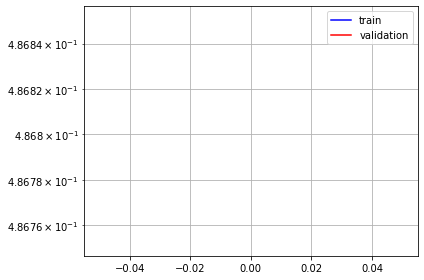

1 0.4759286940097809 0.47709324955940247


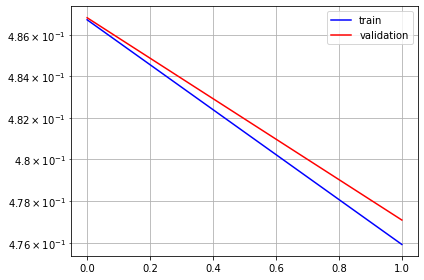

2 0.4684165120124817 0.47012943029403687


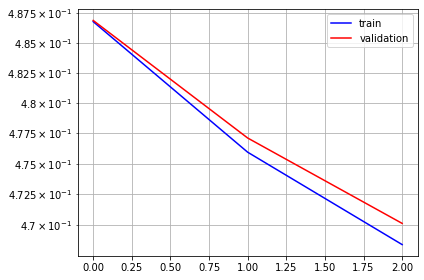

3 0.46179747581481934 0.46389317512512207


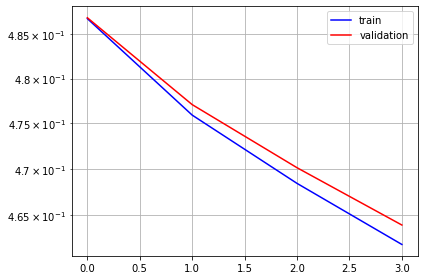

4 0.4562307298183441 0.45855385065078735


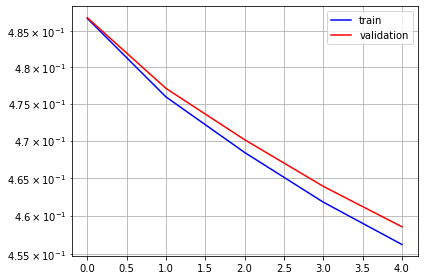

5 0.44886595010757446 0.45150214433670044


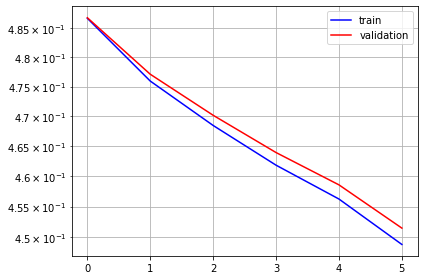

6 0.4421331286430359 0.4454565644264221


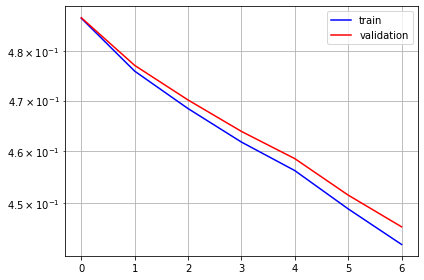

7 0.43601951003074646 0.4398324489593506


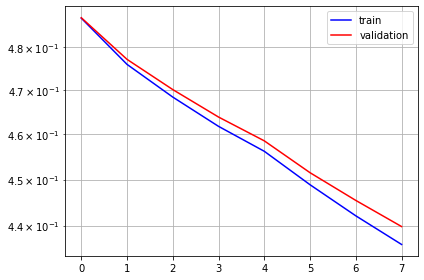

8 0.4262537360191345 0.4299265742301941


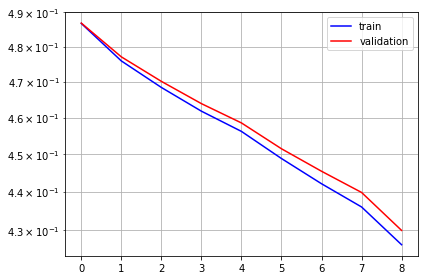

9 0.40956443548202515 0.4138493835926056


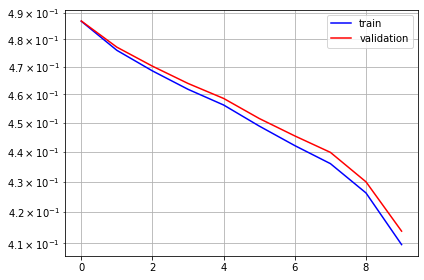

10 0.40158703923225403 0.40627768635749817


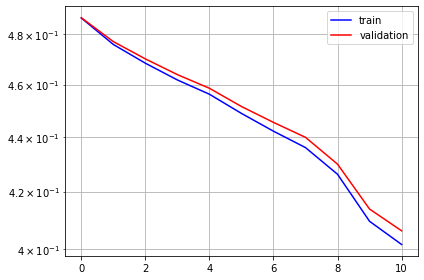

11 0.3938583731651306 0.3990793526172638


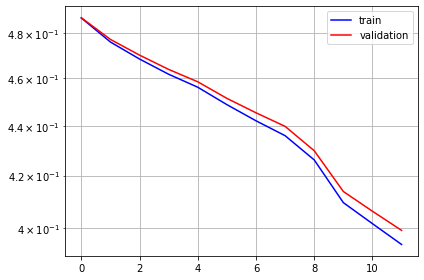

12 0.38900214433670044 0.39467883110046387


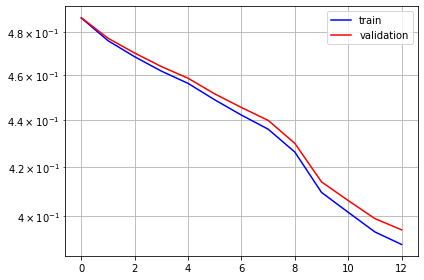

13 0.38638007640838623 0.3925648331642151


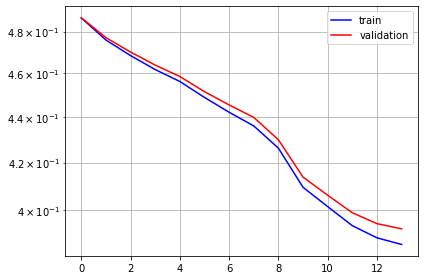

14 0.3836804926395416 0.39036500453948975


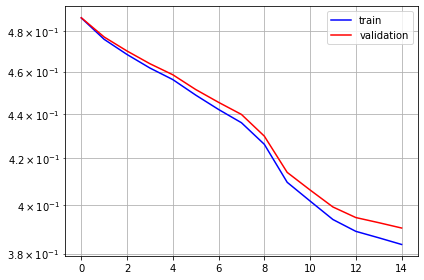

15 0.3809966742992401 0.38814517855644226


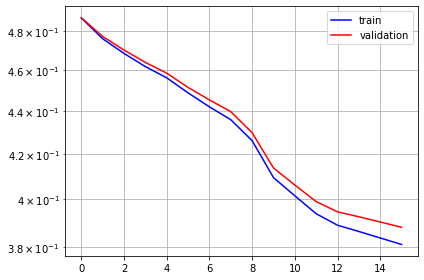

16 0.3779590129852295 0.38568902015686035


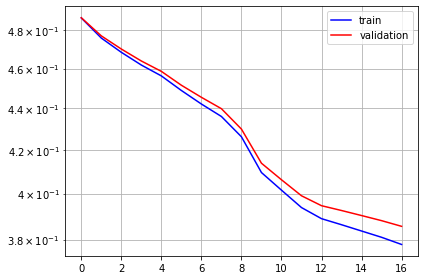

17 0.3756731152534485 0.3837493658065796


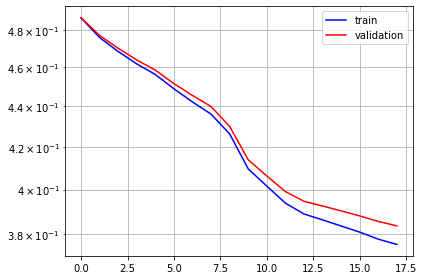

18 0.3738996982574463 0.38226327300071716


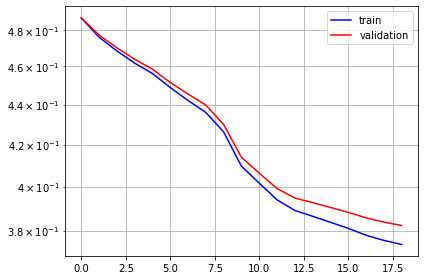

19 0.37244293093681335 0.3813951015472412


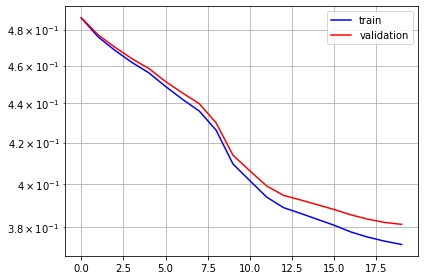

20 0.37589654326438904 0.3851062059402466


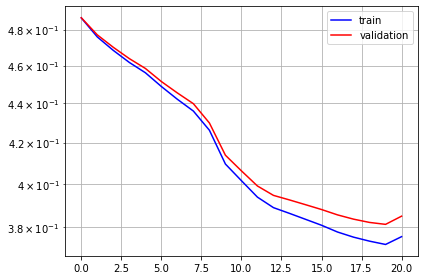

21 0.37528255581855774 0.3846622407436371


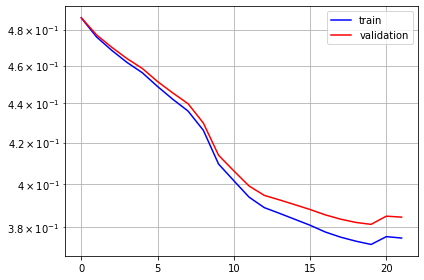

22 0.38105419278144836 0.39079561829566956


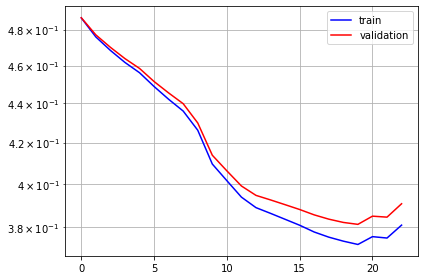

23 0.3746243715286255 0.38476940989494324


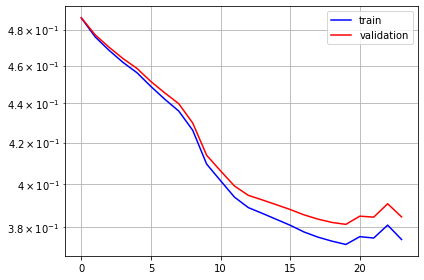

24 0.3691002130508423 0.3803294897079468


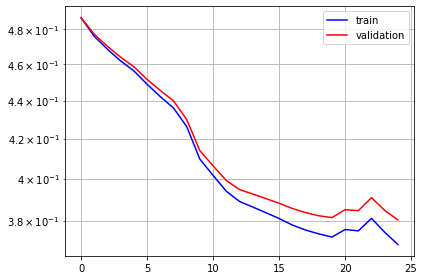

25 0.3696398138999939 0.38111063838005066


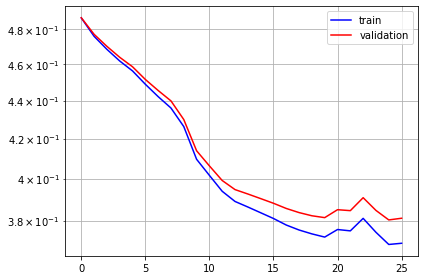

26 0.3668166697025299 0.37928709387779236


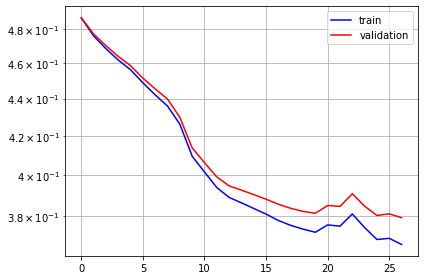

27 0.36563074588775635 0.37853747606277466


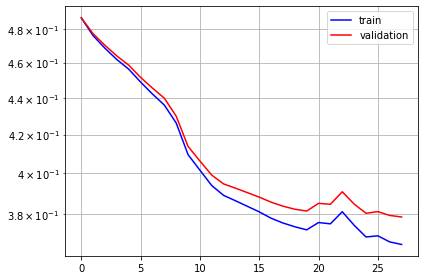

28 0.3653819262981415 0.3784814476966858


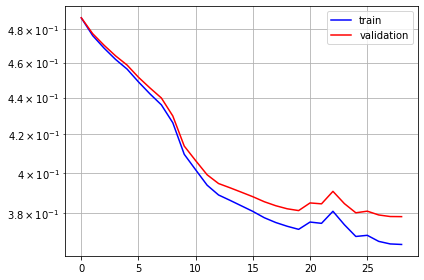

29 0.3646693825721741 0.37799006700515747


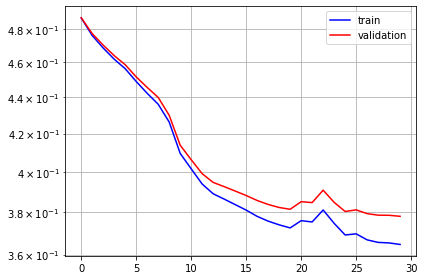

30 0.3637830317020416 0.3776157796382904


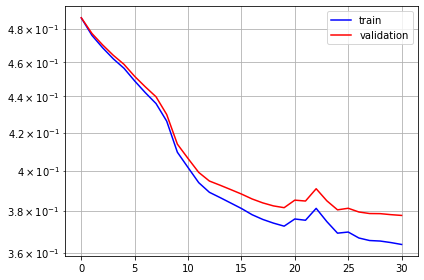

31 0.36357149481773376 0.3777855932712555


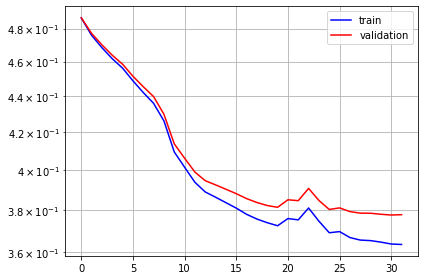

32 0.36303579807281494 0.3777831494808197


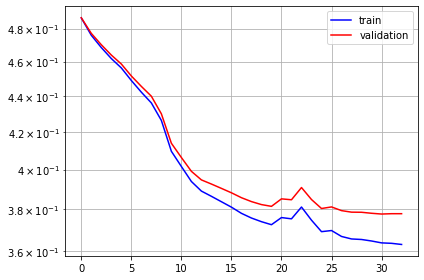

33 0.363081693649292 0.3781120181083679


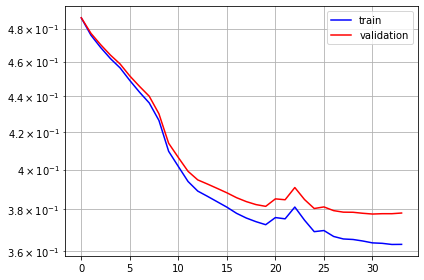

34 0.3625658452510834 0.37816253304481506


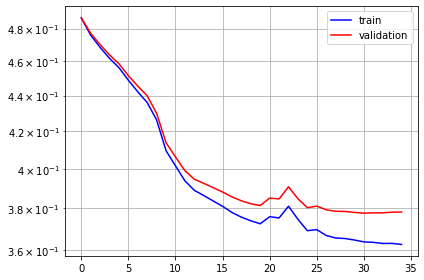

35 0.36094561219215393 0.37677377462387085


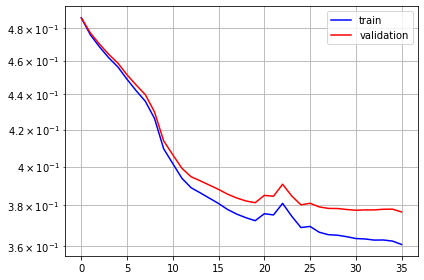

36 0.3611178696155548 0.3774717152118683


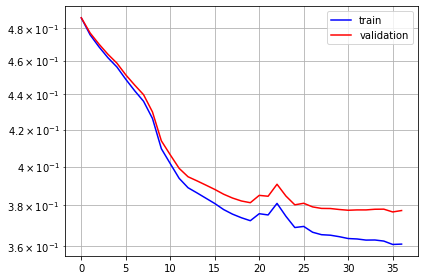

37 0.36100253462791443 0.37769806385040283


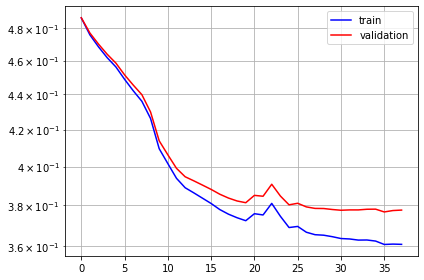

38 0.3599383234977722 0.37713131308555603


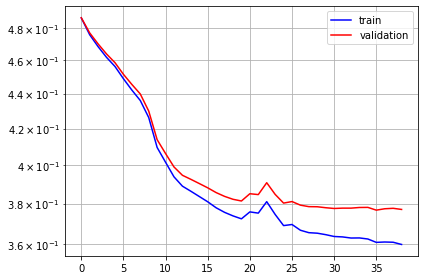

39 0.35889434814453125 0.37692806124687195


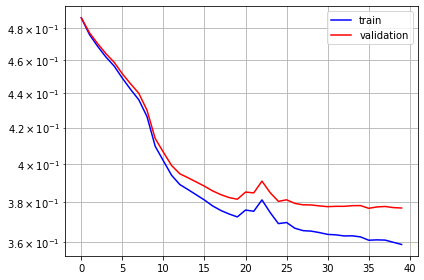

40 0.3580651879310608 0.3763984441757202


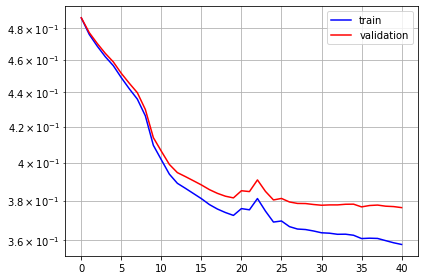

41 0.3576875925064087 0.37657150626182556


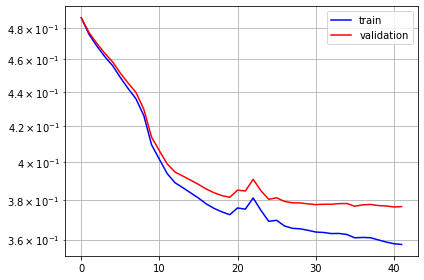

42 0.357266366481781 0.37686997652053833


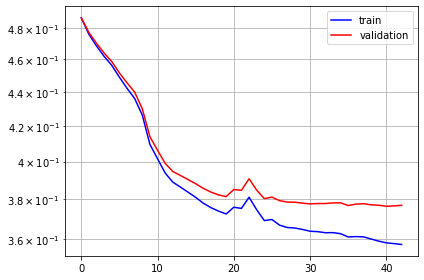

43 0.35821062326431274 0.37772172689437866


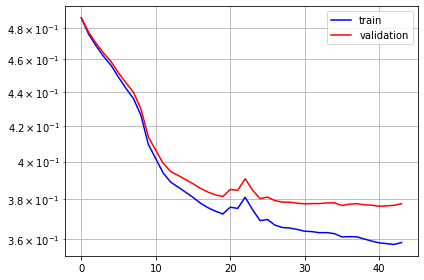

44 0.3571305274963379 0.3771958649158478


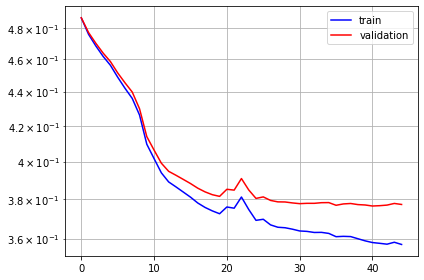

45 0.3558720350265503 0.3764353096485138


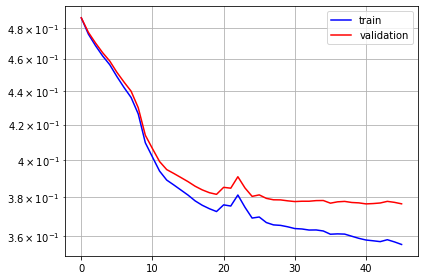

46 0.35484254360198975 0.3763178884983063


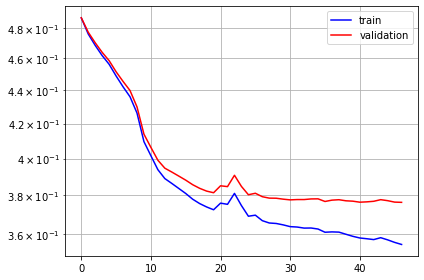

47 0.3538671135902405 0.37571412324905396


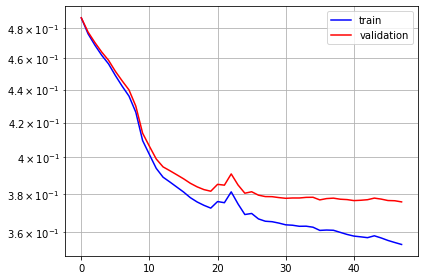

48 0.35426750779151917 0.3769336938858032


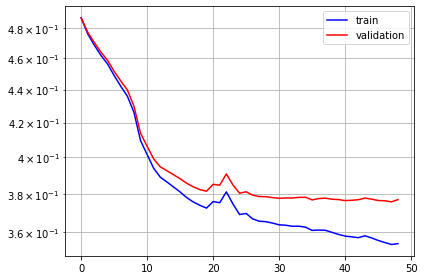

49 0.3535740077495575 0.37713494896888733


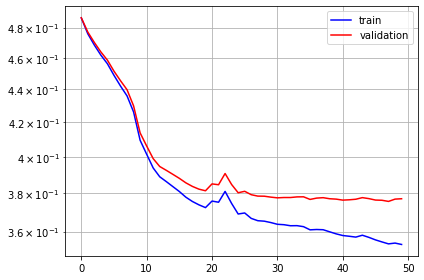

50 0.3527581989765167 0.3767576217651367


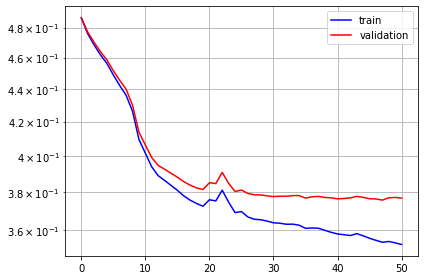

51 0.3527698218822479 0.37728771567344666


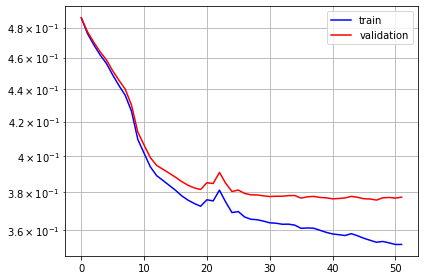

52 0.35242506861686707 0.3776639699935913


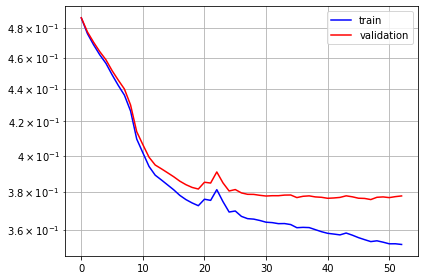

53 0.35263827443122864 0.37853172421455383


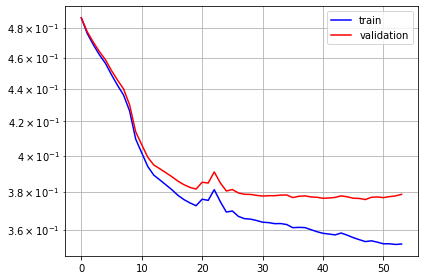

54 0.35214462876319885 0.37850290536880493


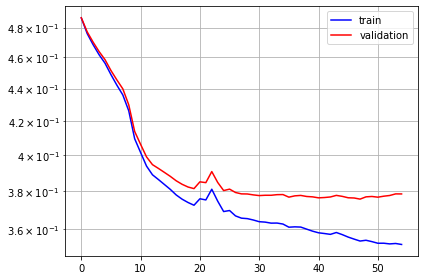

55 0.350595623254776 0.3780326247215271


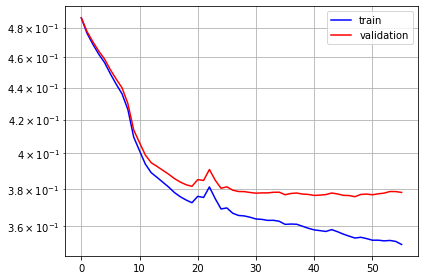

56 0.3510529398918152 0.37860986590385437


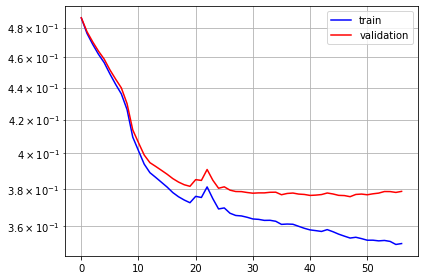

57 0.34830155968666077 0.3771789073944092


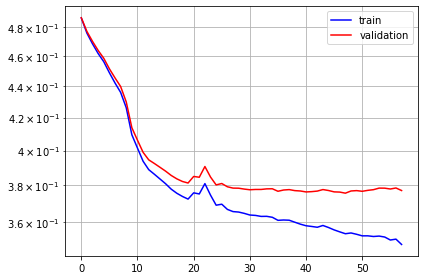

58 0.3486788868904114 0.37781473994255066


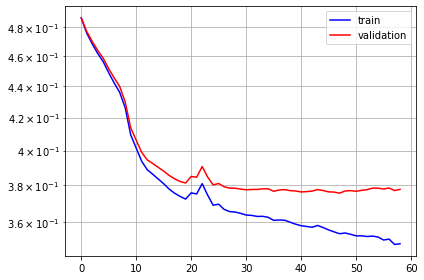

59 0.3478067219257355 0.3775562047958374


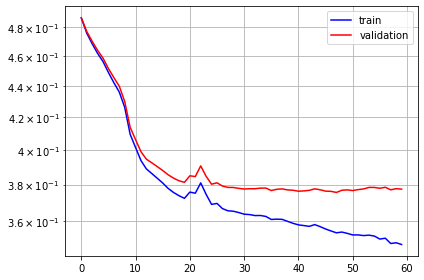

60 0.35080599784851074 0.38023433089256287


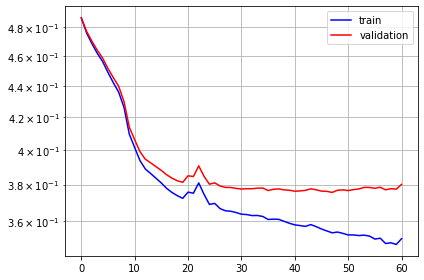

61 0.350346177816391 0.3806140124797821


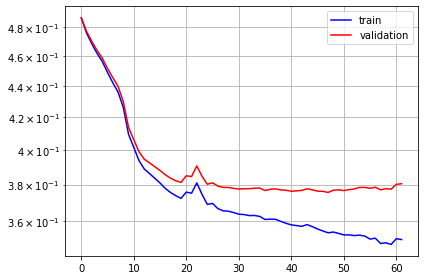

62 0.350538432598114 0.38143274188041687


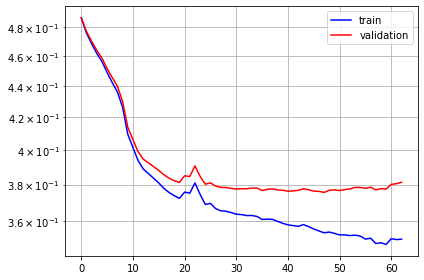

63 0.3505968749523163 0.3821699023246765


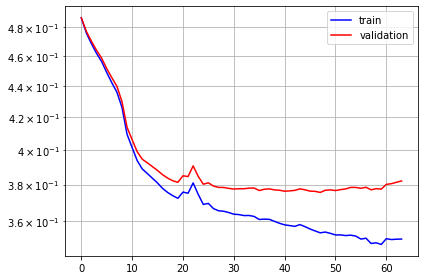

64 0.3488774001598358 0.38040828704833984


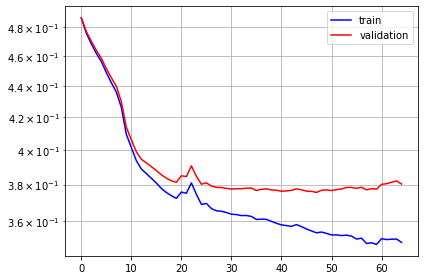

65 0.3510330617427826 0.38357529044151306


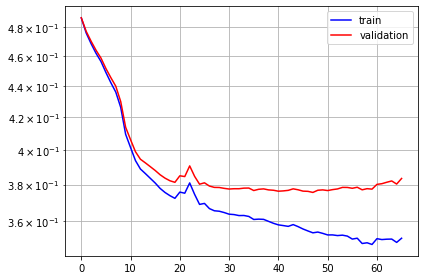

66 0.34850507974624634 0.3810375928878784


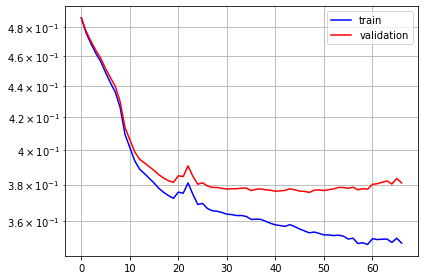

67 0.34758272767066956 0.38071209192276


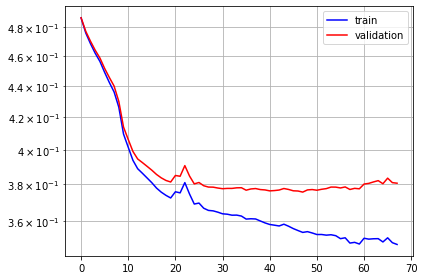

68 0.34853628277778625 0.3820779323577881


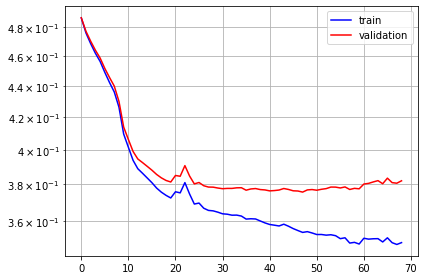

69 0.34768790006637573 0.3817574083805084


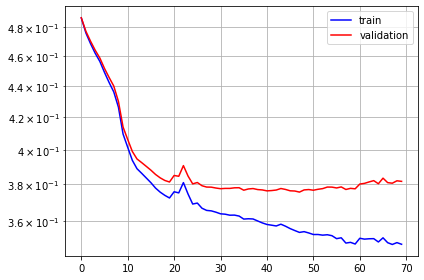

70 0.3509396016597748 0.38526010513305664


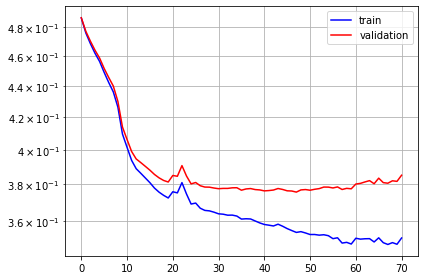

71 0.3504272401332855 0.38460007309913635


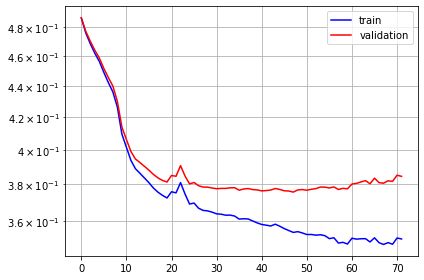

72 0.350043922662735 0.385018914937973


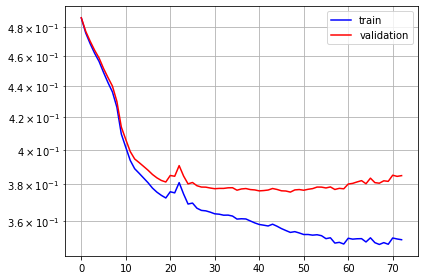

73 0.3503299653530121 0.3861396908760071


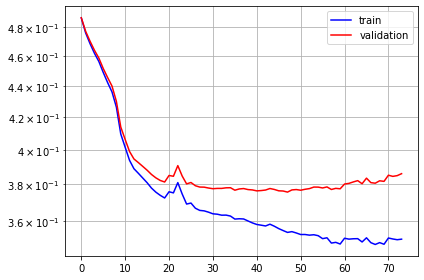

74 0.3482743203639984 0.3835020065307617


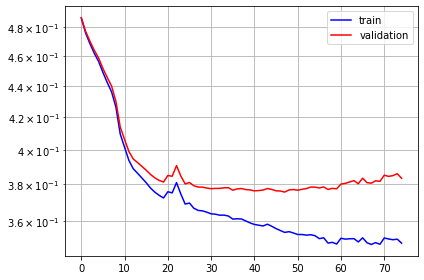

75 0.35089096426963806 0.38605445623397827


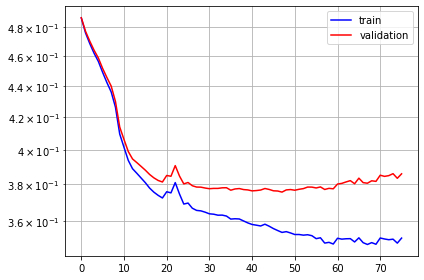

76 0.35076773166656494 0.3865879774093628


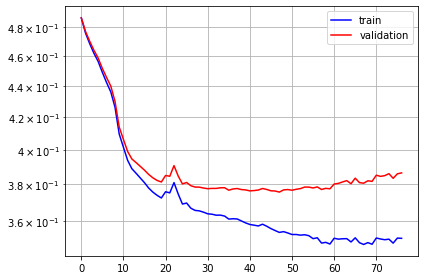

77 0.3502720296382904 0.3868963122367859


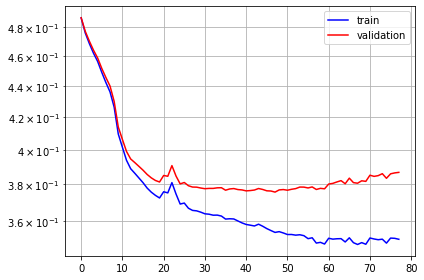

78 0.35158488154411316 0.3880200982093811


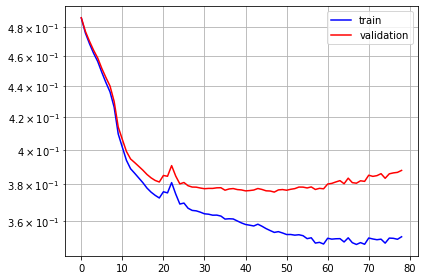

79 0.3504263162612915 0.38789474964141846


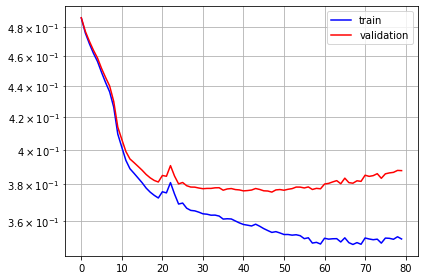

80 0.35117194056510925 0.3890586793422699


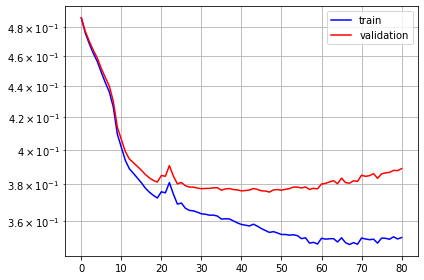

81 0.34865516424179077 0.38640424609184265


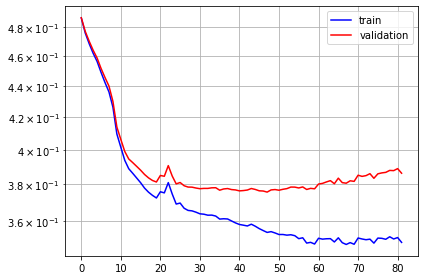

82 0.3508159816265106 0.3887593150138855


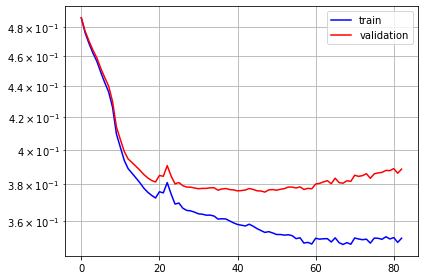

83 0.35220667719841003 0.39087504148483276


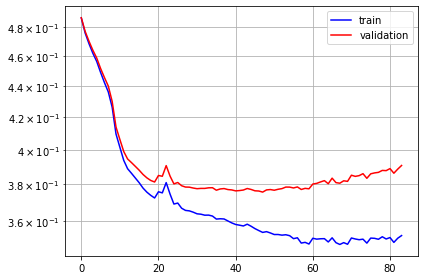

84 0.3484085500240326 0.38795968890190125


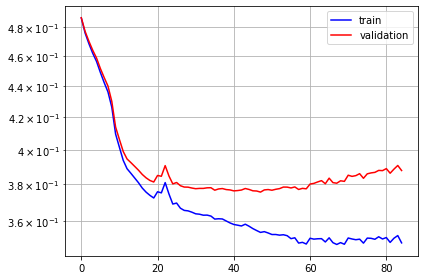

85 0.34906861186027527 0.3893134295940399


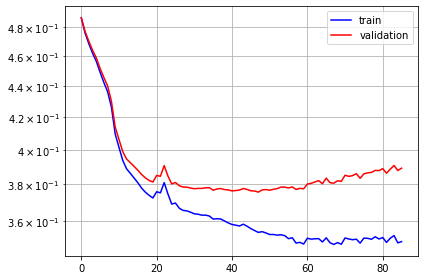

86 0.3467557728290558 0.38787636160850525


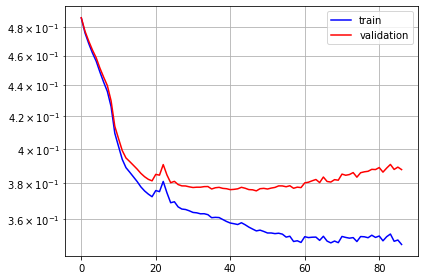

87 0.34684449434280396 0.3879354000091553


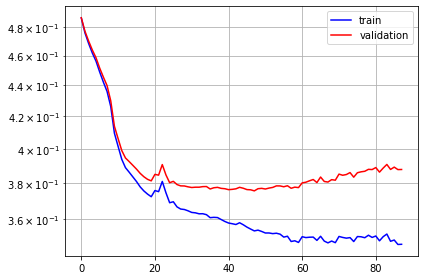

88 0.3467060625553131 0.3887157440185547


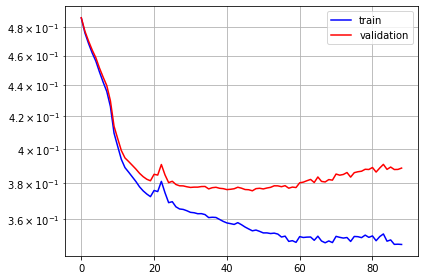

89 0.3432832956314087 0.3859122693538666


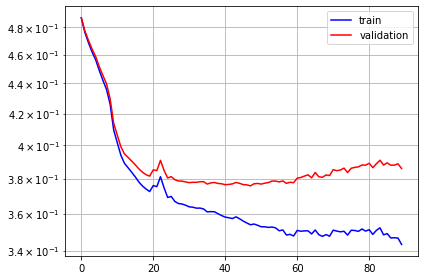

90 0.34491968154907227 0.3877672553062439


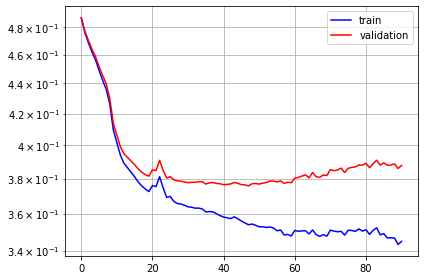

91 0.3449762463569641 0.3895842134952545


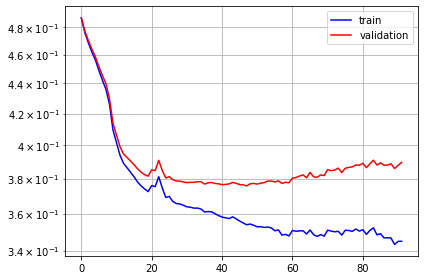

92 0.3425333797931671 0.3864656388759613


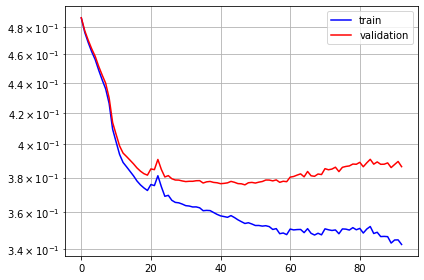

93 0.3415602743625641 0.38649609684944153


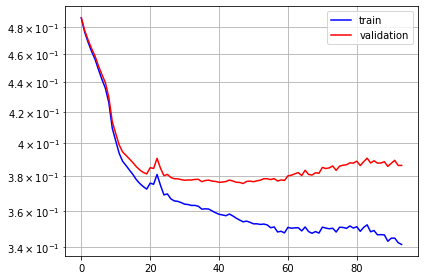

94 0.34010031819343567 0.38610830903053284


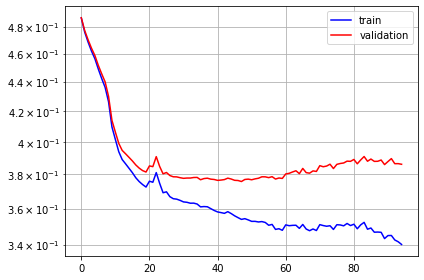

95 0.3413260281085968 0.3867998421192169


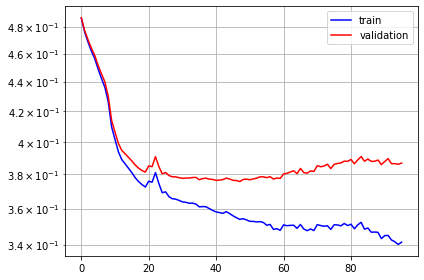

96 0.34015533328056335 0.3865651786327362


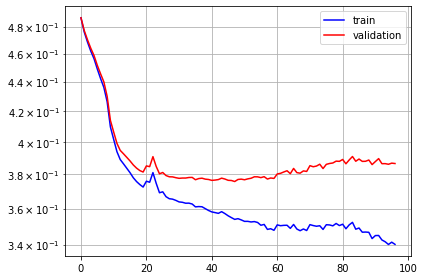

97 0.3396708071231842 0.38706597685813904


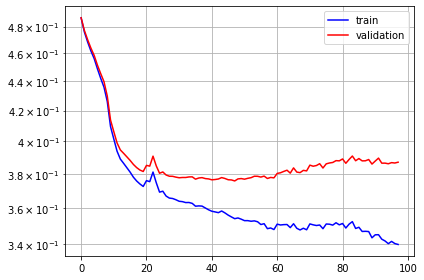

98 0.3390063941478729 0.3875393569469452


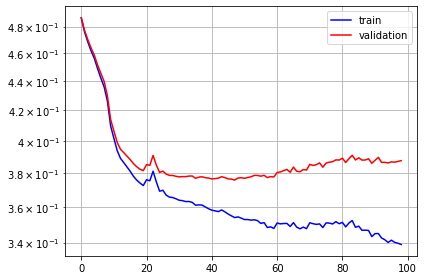

99 0.3431337773799896 0.39175543189048767


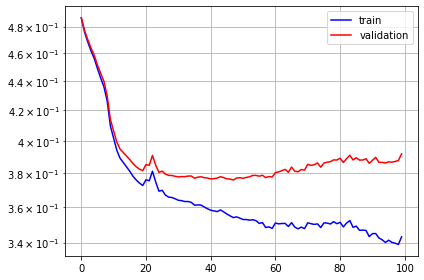

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# Check CUDA
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

# Load data
data = np.load('train_data.npz')
train_features, train_labels, train_weights = data['features'], data['labels'], data['weights']

data = np.load('valid_data.npz')
valid_features, valid_labels, valid_weights = data['features'], data['labels'], data['weights']

# Convert to pytorch array and transfer to device
train_features, train_labels = torch.from_numpy(train_features).to(DEVICE), torch.from_numpy(train_labels).to(DEVICE)
valid_features, valid_labels = torch.from_numpy(valid_features).to(DEVICE), torch.from_numpy(valid_labels).to(DEVICE)

# Build model
model = nn.Sequential(
    nn.Linear(30, 64),
    nn.ReLU(),
    nn.Linear(64, 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 1),
).to(DEVICE)

# Initialize optimizer
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# Train
train_losses, valid_losses = [], []
min_valid_loss = 1e100

# Train up to 1000 epoches
for epoch in range(100):
    # 1. Use a mini-batch of 1000 examples in each training step
    for i in range(0, len(train_features), 1000):
        # (1) Get mini-batch data
        features, labels = train_features[i: i + 1000], train_labels[i: i + 1000]
        # (2) Forward
        predictions = model(features).view(-1)
        # (3) Calculate loss
        loss = F.binary_cross_entropy_with_logits(predictions, labels)
        # (4) Zero gradient accumulation
        optimizer.zero_grad()
        # (5) Backpropagation
        loss.backward()
        # (6) Update model parameters
        optimizer.step()

    with torch.no_grad():
        # 2. Calculate training loss
        predictions = model(train_features).view(-1)
        train_loss = F.binary_cross_entropy_with_logits(predictions, train_labels).item()
        train_losses.append(train_loss)

        # 3. Make predictions on validation set and calculate validation loss
        predictions = model(valid_features).view(-1)
        valid_loss = F.binary_cross_entropy_with_logits(predictions, valid_labels).item()
        valid_losses.append(valid_loss)

        predictions = torch.sigmoid(predictions)

        # 4. Save the best model and its predictions
        if valid_loss < min_valid_loss:
            min_valid_loss = valid_loss
            torch.save(model, 'best_model.torch')
            np.savez_compressed('predictions.npz', predictions=predictions.cpu(), labels=valid_labels.cpu(), weights=valid_weights)

    print(epoch, train_loss, valid_loss)

    # Plot losses
    plt.clf()
    plt.plot(train_losses, 'b', label='train')
    plt.plot(valid_losses, 'r', label='validation')
    plt.yscale('log')
    plt.legend()
    plt.grid(which='both')
    plt.tight_layout()
    plt.pause(0.001)

plt.show()

# testing tne model

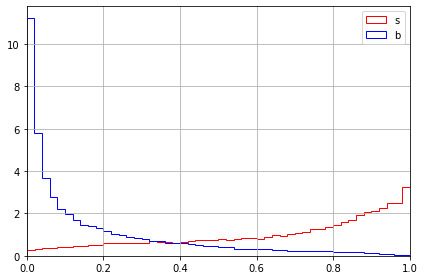

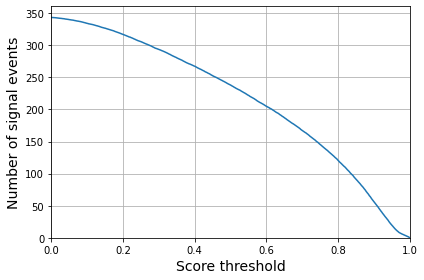

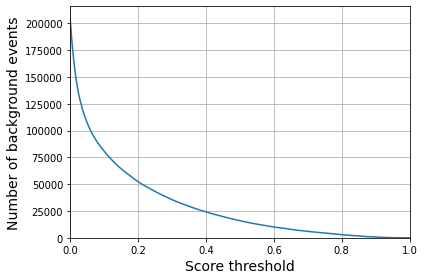

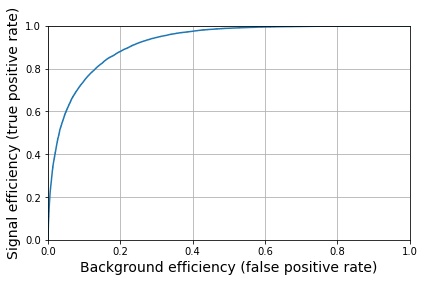

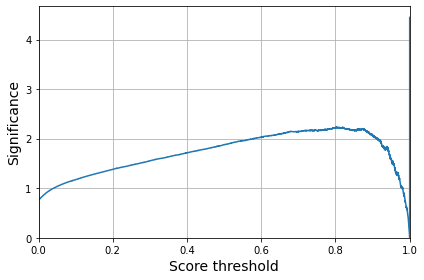

In [ ]:

# Load predictions
data = np.load('predictions.npz')
predictions, labels, weights = data['predictions'], data['labels'], data['weights']

# Sort predictions
index = np.argsort(predictions)[::-1]
predictions, labels, weights = predictions[index], labels[index], weights[index]

# Plot score distribution
plt.figure()
plt.hist(predictions[labels == 1], bins=50, density=True, histtype='step', color='r', label='s')
plt.hist(predictions[labels == 0], bins=50, density=True, histtype='step', color='b', label='b')
plt.xlim(0, 1)
plt.ylim(bottom=0)
plt.legend()
plt.grid()
plt.tight_layout()

# Build table [threshold, s, b, Z]
table = np.empty([len(predictions) + 1, 4])
table[0, 0] = 1

for i in range(len(predictions)):
    if labels[i] == 1:
        s = table[i, 1] + weights[i]
        b = table[i, 2]
    else:
        s = table[i, 1]
        b = table[i, 2] + weights[i]
    Z = np.sqrt(2 * ((s + b + 10) * np.log(1 + s / (b + 10)) - s))

    table[i + 1] = [predictions[i], s, b, Z]

# Plot
plt.figure()
plt.plot(table[:, 0], table[:, 1])
plt.xlim(0, 1)
plt.ylim(bottom=0)
plt.grid()
plt.xlabel('Score threshold', fontsize=14)
plt.ylabel('Number of signal events', fontsize=14)
plt.tight_layout()

plt.figure()
plt.plot(table[:, 0], table[:, 2])
plt.xlim(0, 1)
plt.ylim(bottom=0)
plt.grid()
plt.xlabel('Score threshold', fontsize=14)
plt.ylabel('Number of background events', fontsize=14)
plt.tight_layout()

plt.figure()
plt.plot(table[:, 2] / weights[labels == 0].sum(), table[:, 1] / weights[labels == 1].sum())
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.grid()
plt.xlabel('Background efficiency (false positive rate)', fontsize=14)
plt.ylabel('Signal efficiency (true positive rate)', fontsize=14)
plt.tight_layout()

plt.figure()
plt.plot(table[:, 0], table[:, 3])
plt.xlim(0, 1)
plt.ylim(bottom=0)
plt.grid()
plt.xlabel('Score threshold', fontsize=14)
plt.ylabel('Significance', fontsize=14)
plt.tight_layout()

plt.show()
